In [1]:
from matplotlib import pyplot as plt
from collections import Counter

# 3. 可视化数据
数据可视化是数据科学家工具箱中的一个重要部分。数据可视化有两种主要用途：
+ 探索数据
+ 交流数据

## 3.1 matplotlib
我们将使用的是应用最广的`matplotlib`库。如果你的兴趣是制作用于网络的精良的交互可视化，它可能不是好的选择，但对于条形图、线图和散点图这些简单的图形来说，它很好用。

特别地，我们会使用`matplotlib.pyplot`模块。在最简单的应用中，pyplot保持着一种内部状态，你可以在其中一步步地创建可视化。一旦创建工作完成，就可以保存(`savefig()`)或显示(`show()`)你的图形。

一个简单的例子：

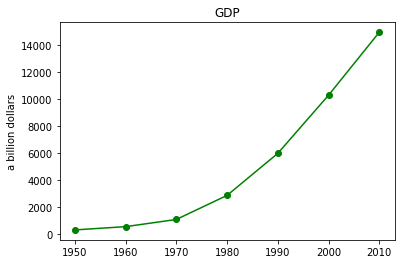

In [2]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010] 
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# 创建一幅线图，x轴是年份， y轴是gdp 
plt.plot(years, gdp, color='green', marker ='o', linestyle ='solid')

# 添加一个标题 
plt.title("GDP")

# 给y轴加标记 
plt.ylabel("a billion dollars") 
plt.show()

## 3.2 条形图
如果你想展示某些离散的项目集合中的数量是如何变化的，可以使用条形图。 比如，`图3-2`显示了几部电影所获得的奥斯卡金像奖的数目：

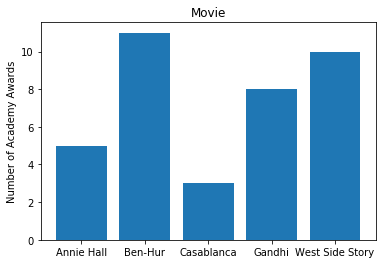

In [3]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"] 
num_oscars = [5, 11, 3, 8, 10] 

# 条形的默认宽度是0.8，因此我们对左侧坐标加上0.1 
# 这样每个条形就被放置在中心了 
xs = [i + 0.1 for i, _ in enumerate(movies)] 

# 使用左侧x坐标[xs]和高度[num_oscars]画条形图 
plt.bar(xs, num_oscars) 
plt.ylabel("Number of Academy Awards") 
plt.title("Movie") 

# 使用电影的名字标记x轴，位置在x轴上条形的中心 
plt.xticks([i+0.1 for i, _ in enumerate(movies)], movies) 
plt.show()

条形图也可以用来绘制拥有大量数值取值的变量直方图，以此来探索这些取值是如何分布的：

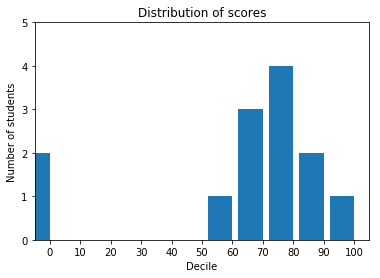

In [4]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0] 
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x - 4 for x in histogram.keys()], # 每个条形向左侧移动4个单位 
          histogram.values(), # 给每个条形设置正确的高度 
          8) # 每个条形的宽度设置为8

plt.axis([-5, 105, 0, 5])
plt.xticks([10 * i for i in range(11)])
plt.xlabel("Decile")
plt.ylabel("Number of students")
plt.title("Distribution of scores") 
plt.show()

`plt.bar`的第三个参数指定了条形的宽度，在这里我们选择宽度为8(这样就在各个条形之间留出了小的间隔，因为x轴是以刻度10做标记的)，而且把每个条形向左移了4个宽度。这样一来，`80`这个条形的左边在76，而右边在84，因此它的中心在80。

对`plt.axis`的调用表明我们希望x轴的范围是`-5~105`（以使`0`到`100`这些条形可以完全显示），并且y轴的范围应限定在`0~5`之间。对`plt.xticks`的调用把x轴的刻度放在`0、10、20、……、100`这些位置。

在使用`plt.axis()`时要谨慎。在创建条形图时，y轴不从`0`开始是一种特别不好的形式，因为这很容易误导人：

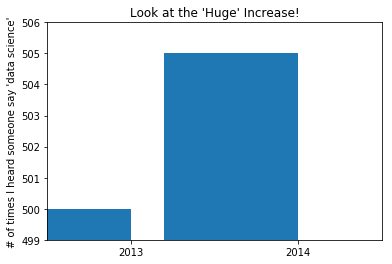

In [5]:
mentions = [500, 505] 
years = [2013, 2014] 

plt.bar([2012.6, 2013.6], mentions, 0.8) 
plt.xticks(years) 
plt.ylabel("# of times I heard someone say 'data science'") 

# 如果不这么做，matplotlib会把x轴的刻度标记为0和1
# 然后会在角上加上+2.013e3(糟糕的matplotlib操作！) 
plt.ticklabel_format(useOffset=False)

# 这会误导y轴只显示500以上的部分 
plt.axis([2012.5,2014.5,499,506]) 
plt.title("Look at the 'Huge' Increase!") 
plt.show()

我们使用一种更合理的轴，这样它看起来就不那么异常了：

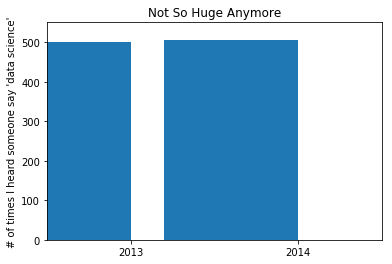

In [6]:
mentions = [500, 505] 
years = [2013, 2014] 

plt.bar([2012.6, 2013.6], mentions, 0.8) 
plt.xticks(years) 
plt.ylabel("# of times I heard someone say 'data science'") 

# 如果不这么做，matplotlib会把x轴的刻度标记为0和1
# 然后会在角上加上+2.013e3(糟糕的matplotlib操作！) 
plt.ticklabel_format(useOffset=False)

plt.axis([2012.5,2014.5,0,550]) 
plt.title("Not So Huge Anymore") 
plt.show()

## 3.3 线图
可以用`plt.plot()`来制作线图。这种图形可以用来清晰地显示某种事物的趋势：

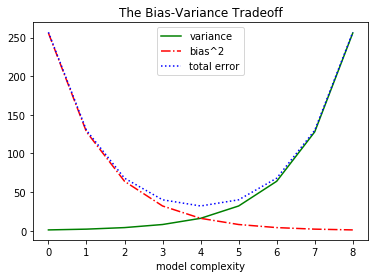

In [7]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256] 
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1] 

total_error = [x + y for x, y in zip(variance, bias_squared)] 
xs = [i for i, _ in enumerate(variance)]

# we can make multiple calls to plt.plot 
# to show multiple series on the same chart 
plt.plot(xs, variance, 'g-', label='variance')  # green solid line 
plt.plot(xs, bias_squared, 'r-.', label='bias^2')  # red dot-dashed line 
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line

# because we've assigned labels to each series 
# we can get a legend for free 
# loc=9 means "top center" 
plt.legend(loc=9) 
plt.xlabel("model complexity") 
plt.title("The Bias-Variance Tradeoff") 
plt.show()

## 3.4 散点图
散点图是显示成对数据集的可视化关系的好选择。比如，下图显示了你的用户们已有的朋友数和他们每天花在网站上的分钟数之间的关系：

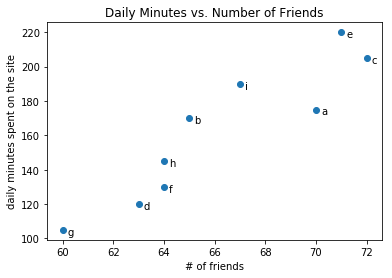

In [8]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67] 
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190] 
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point 
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label, xy=(friend_count, minute_count), # put the label with its point 
                      xytext=(5, -5), # but slightly offset 
                      textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends") 
plt.ylabel("daily minutes spent on the site") 
plt.show()

当你分散了可比较的变量，如果让`matplotlib`选择刻度，可能会得到一个误导性的图：

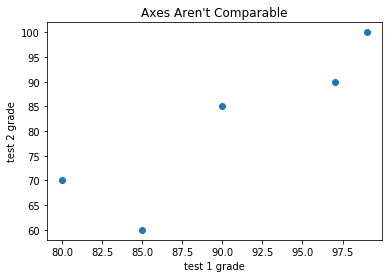

In [9]:
test_1_grades = [ 99, 90, 85, 97, 80] 
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades) 
plt.title("Axes Aren't Comparable") 
plt.xlabel("test 1 grade") 
plt.ylabel("test 2 grade") 
plt.show()

如果我们引入对`plt.axis("equal")`的调用，图形会更精确地显示大多数变化：

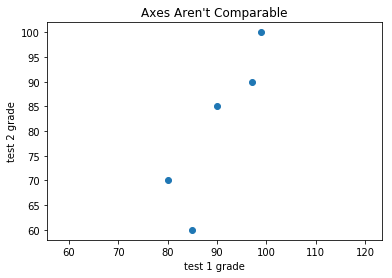

In [10]:
test_1_grades = [ 99, 90, 85, 97, 80] 
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades) 
plt.axis("equal")
plt.title("Axes Aren't Comparable") 
plt.xlabel("test 1 grade") 
plt.ylabel("test 2 grade") 
plt.show()